In [1]:
import copy
import itertools
import os
import sys
sys.path.append("/workspace/mta_vision_transformers/")
from collections import OrderedDict
from typing import Any, Callable, Dict, List, Literal, Set, Tuple

import matplotlib
import matplotlib.colors
import numpy as np
import einops
import torch

import torch.nn as nn
import torch.nn.functional as Fn
import torch.utils.data
from matplotlib import pyplot as plt
from tensordict import TensorDict
from torch.utils._pytree import tree_flatten

from infrastructure import utils
from dataset.library import DATASETS


dataset_name, n_classes = DATASETS["Common"][1]
OUTPUT_DIR = "experiments/plots"
EXPERIMENT_DIR = "figures"
if not os.path.exists(f"{OUTPUT_DIR}/{EXPERIMENT_DIR}"):
    os.makedirs(f"{OUTPUT_DIR}/{EXPERIMENT_DIR}", exist_ok=True)
    
# Ocean: 901085904
# Rose: 100390212
torch.set_printoptions(linewidth=400, sci_mode=False)

/opt/conda/lib/python3.10/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


Seed: 1149496617


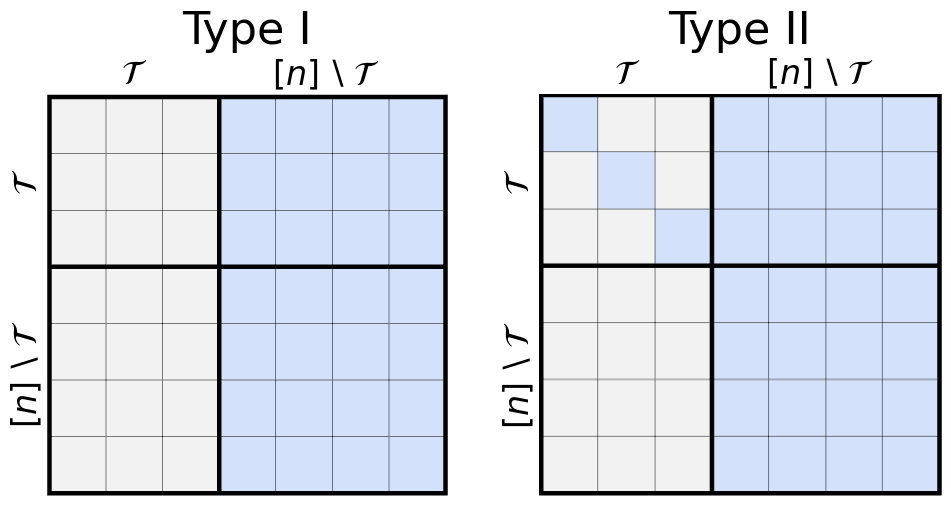

In [7]:
from matplotlib.axes import Axes
from matplotlib.patches import Rectangle
from PIL import Image

from modeling.vit_attention import OpenCLIPAttentionViT
from visualize.base import PLOT_SCALE


toy_mask = torch.tensor([[True, True, True, False, False, False, False, False]])
n = toy_mask.shape[1]

type_names = ("I", "II")
descs = ("")
fig, axs = plt.subplots(nrows=1, ncols=len(type_names), figsize=(PLOT_SCALE * len(type_names), PLOT_SCALE))
for ax_idx, type_name in enumerate(type_names):
    ax: Axes = axs[ax_idx]
    # mask = OpenCLIPAttentionViT.process_mask(toy_mask, mask_type)[0].expand((n, n))
    with open(f"{OUTPUT_DIR}/{EXPERIMENT_DIR}/Type {type_name}.png", "rb") as fp:
        im = Image.open(fp).convert("RGB")
    ax.text(89, -20, "$\mathcal{T}$", ha="center", va="center", fontsize=24)
    ax.text(285, -20, "$[n] \setminus \mathcal{T}$", ha="center", va="center", fontsize=24)
    ax.text(-20, 89, "$\mathcal{T}$", ha="center", va="center", fontsize=24, rotation="vertical")
    ax.text(-20, 285, "$[n] \setminus \mathcal{T}$", ha="center", va="center", fontsize=24, rotation="vertical")
        
    ax.imshow(im)
    ax.axis("off")
    ax.set_title(f"Type {type_name}", pad=36, fontsize=32)

fig.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/{EXPERIMENT_DIR}/masking_patterns.pdf", bbox_inches="tight")
plt.show()